Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Reading the Dataset

In [ ]:
football_df=pd.read_csv("fifa_players.csv")
remove_colums = ['national_team','national_rating','national_team_position']
football_df = football_df.drop(remove_colums, axis=1)


In [ ]:
football_df.head()
football_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   full_name                      17954 non-null  object 
 2   age                            17954 non-null  int64  
 3   height_cm                      17954 non-null  float64
 4   weight_kgs                     17954 non-null  float64
 5   positions                      17954 non-null  object 
 6   nationality                    17954 non-null  object 
 7   overall_rating                 17954 non-null  int64  
 8   potential                      17954 non-null  int64  
 9   preferred_foot                 17954 non-null  object 
 10  international_reputation(1-5)  17954 non-null  int64  
 11  weak_foot(1-5)                 17954 non-null  int64  
 12  skill_moves(1-5)               17954 non-null 

Cleaning the data   

In [ ]:
print(football_df.isnull().sum())

name                             0
full_name                        0
age                              0
height_cm                        0
weight_kgs                       0
positions                        0
nationality                      0
overall_rating                   0
potential                        0
preferred_foot                   0
international_reputation(1-5)    0
weak_foot(1-5)                   0
skill_moves(1-5)                 0
crossing                         0
finishing                        0
heading_accuracy                 0
short_passing                    0
volleys                          0
dribbling                        0
curve                            0
freekick_accuracy                0
long_passing                     0
ball_control                     0
acceleration                     0
sprint_speed                     0
agility                          0
reactions                        0
balance                          0
shot_power          

Performing EDA(Exploratory Data Analysis)


Top 10 Highest Rated Players

In [ ]:
column_name = 'overall_rating'
highest_values = football_df.nlargest(10, column_name)
col = ['name','overall_rating','nationality']
name = highest_values[col]
print(name)

                    name  overall_rating nationality
0               L. Messi              94   Argentina
17944  Cristiano Ronaldo              94    Portugal
17943          Neymar Jr              92      Brazil
17938          L. Suárez              91     Uruguay
17939          L. Modrić              91     Croatia
17940          E. Hazard              91     Belgium
17941       K. De Bruyne              91     Belgium
17942             De Gea              91       Spain
17930       G. Chiellini              90       Italy
17931       Sergio Ramos              90       Spain


Top 10 performing country

In [ ]:
nationality_stats = football_df.groupby('nationality').agg(
    average_overall_rating=('overall_rating', 'mean')
).reset_index()

print(nationality_stats.nlargest(10, 'average_overall_rating'))

              nationality  average_overall_rating
150  United Arab Emirates               77.000000
40     Dominican Republic               72.000000
102            Mozambique               72.000000
111                  Oman               72.000000
141   São Tomé & Príncipe               72.000000
75                 Israel               71.666667
119              Portugal               71.113433
18                 Brazil               71.051683
89                  Libya               71.000000
105         New Caledonia               71.000000


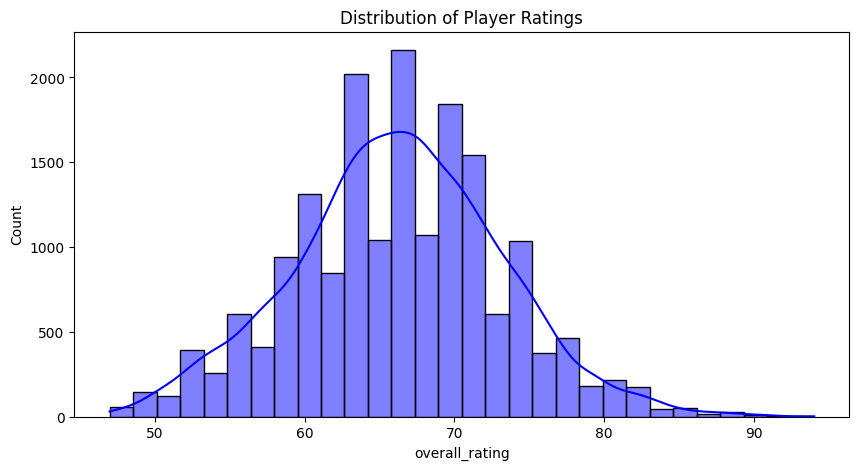

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(football_df['overall_rating'], bins=30, kde=True, color='blue')
plt.title("Distribution of Player Ratings")
plt.show()

Now we perform K-Means Clustering

1.Top Play makers

In [ ]:
play_maker = ['crossing','dribbling','long_passing','positioning','stamina','positioning','vision']
play_maker_df = football_df[['name', 'nationality'] + play_maker]
player_means = play_maker_df.groupby(['name', 'nationality'])[play_maker].mean().mean(axis=1)
top_10 = player_means.nlargest(10).reset_index()
print(top_10)

                name nationality          0
0           L. Messi   Argentina  90.444444
1       K. De Bruyne     Belgium  89.000000
2  Cristiano Ronaldo    Portugal  88.777778
3          Neymar Jr      Brazil  87.111111
4        David Silva       Spain  87.000000
5       A. Griezmann      France  86.888889
6         C. Eriksen     Denmark  86.666667
7          E. Hazard     Belgium  86.555556
8           M. Salah       Egypt  86.333333
9          L. Suárez     Uruguay  86.000000


2.Top Defenders

In [ ]:
defence = ['marking','standing_tackle','sliding_tackle','aggression','interceptions','vision']
play_maker_df = football_df[['name', 'nationality'] + defence]
player_means = play_maker_df.groupby(['name', 'nationality'])[defence].mean().mean(axis=1)
top_10 = player_means.nlargest(10).reset_index()
print(top_10)

              name nationality          0
0         N. Kanté      France  88.000000
1  Sergio Busquets       Spain  85.833333
2         A. Vidal       Chile  85.500000
3            Allan      Brazil  85.500000
4     Sergio Ramos       Spain  85.500000
5      Azpilicueta       Spain  84.833333
6         Casemiro      Brazil  84.833333
7    Javi Martínez       Spain  84.833333
8    R. Nainggolan     Belgium  84.833333
9     G. Chiellini       Italy  84.500000


3.Top strikers

In [ ]:
striker = ['finishing','heading_accuracy','volleys','freekick_accuracy','shot_power','penalties','composure']
play_maker_df = football_df[['name', 'nationality'] + striker]
player_means = play_maker_df.groupby(['name', 'nationality'])[striker].mean().mean(axis=1)
top_10 = player_means.nlargest(10).reset_index()
print(top_10)

                name nationality          0
0  Cristiano Ronaldo    Portugal  88.714286
1     R. Lewandowski      Poland  87.285714
2     Z. Ibrahimović      Sweden  86.571429
3          L. Suárez     Uruguay  86.285714
4           L. Messi   Argentina  85.857143
5       A. Griezmann      France  85.428571
6          E. Cavani     Uruguay  85.428571
7            G. Bale       Wales  85.142857
8          S. Agüero   Argentina  84.142857
9          P. Dybala   Argentina  82.857143


4.Top midfielders


In [ ]:
midfielders = ['long_passing','ball_control','long_shots','positioning','vision','stamina','strength']
play_maker_df = football_df[['name', 'nationality'] + midfielders]
player_means = play_maker_df.groupby(['name', 'nationality'])[midfielders].mean().mean(axis=1)
top_10 = player_means.nlargest(10).reset_index()
print(top_10)

                  name nationality          0
0         K. De Bruyne     Belgium  88.285714
1    Cristiano Ronaldo    Portugal  86.857143
2             P. Pogba      France  86.714286
3             L. Messi   Argentina  86.428571
4           C. Eriksen     Denmark  84.857143
5                 Koke       Spain  84.428571
6            L. Suárez     Uruguay  84.428571
7  S. Milinković-Savić      Serbia  84.142857
8             T. Kroos     Germany  84.000000
9        R. Nainggolan     Belgium  83.428571


Predicting Future performance by Regression model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split


In [ ]:
X = football_df[['age', 'dribbling', 'short_passing','long_passing', 'long_shots','shot_power', 'stamina','strength']]
y = football_df['potential']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"MAE: {mae}, MSE: {mse}")

MAE: 2.7507407407407407, MSE: 13.78555463659148
